In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Intern task/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
# Check general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
import numpy as np

# Some rows have ' ' or weird values; force conversion safely
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing or invalid values with median
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Verify
print(df['TotalCharges'].isnull().sum())  # should show 0
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object

/tmp/ipython-input-2034080406.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


/tmp/ipython-input-47797471.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


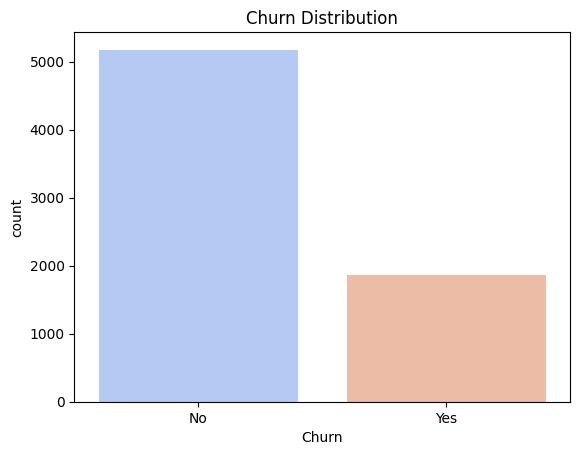

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Churn distribution
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title("Churn Distribution")
plt.show()

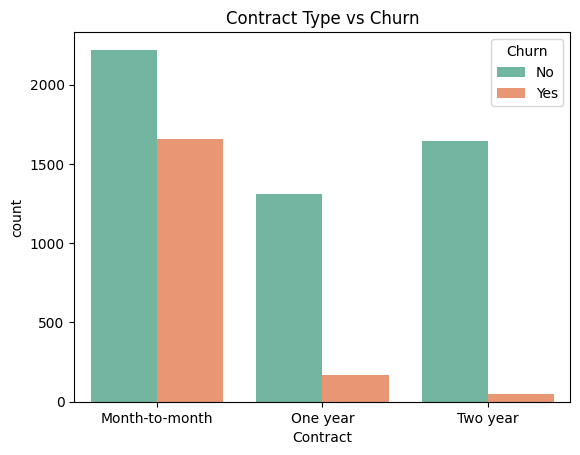

In [ ]:
# Churn vs Contract type
sns.countplot(x='Contract', hue='Churn', data=df, palette='Set2')
plt.title("Contract Type vs Churn")
plt.show()

/tmp/ipython-input-3578587816.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')


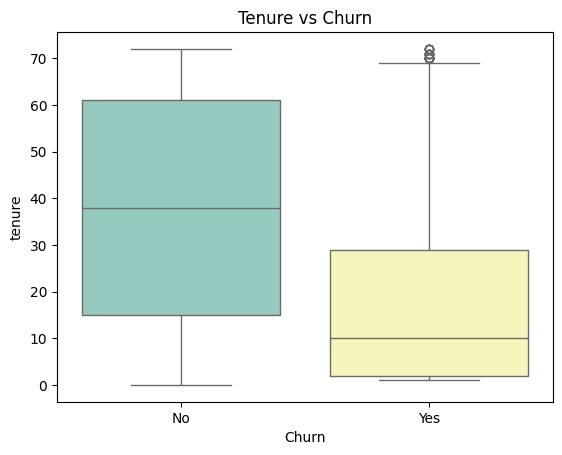

In [ ]:
# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')
plt.title("Tenure vs Churn")
plt.show()

/tmp/ipython-input-1557834683.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')


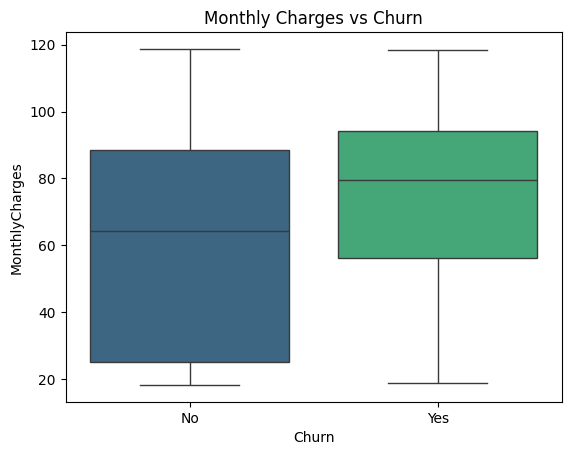

In [ ]:
# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')
plt.title("Monthly Charges vs Churn")
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Copy the dataset
data = df.copy()

# Encode categorical (text) columns
for col in data.select_dtypes(include='object').columns:
    data[col] = LabelEncoder().fit_transform(data[col])

# Verify encoding
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)

Training data: (5634, 20)
Testing data: (1409, 20)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.65      0.49      0.56       373

    accuracy                           0.79      1409
   macro avg       0.74      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
 [[939  97]
 [192 181]]


In [ ]:
!pip install eli5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 3.7 MB/s eta 0:00:00


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

# Calculate feature importance
perm = PermutationImportance(model, random_state=42).fit(X_test, y_test)

# Display top features
eli5.show_weights(perm, feature_names=list(X.columns))

Weight,Feature
0.0190 ± 0.0058,Contract
0.0061 ± 0.0086,tenure
0.0061 ± 0.0068,MonthlyCharges
0.0057 ± 0.0076,PaperlessBilling
0.0013 ± 0.0055,TechSupport
0.0006 ± 0.0019,PhoneService
0.0006 ± 0.0064,gender
0.0004 ± 0.0051,TotalCharges
-0.0003 ± 0.0065,PaymentMethod
-0.0004 ± 0.0068,OnlineBackup


In [ ]:
print(df.columns.tolist())

['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
# Predict churn probability
y_prob = model.predict_proba(X_test)[:, 1]

# Create a copy of original data for results
df_results = df.iloc[y_test.index].copy()
df_results['churn_prob'] = y_prob

# Define segmentation rules
def segment(p):
    if p >= 0.7:
        return 'At Risk'
    elif p >= 0.3:
        return 'Dormant'
    else:
        return 'Loyal'

df_results['Segment'] = df_results['churn_prob'].apply(segment)

# Show sample results
df_results[['customerID', 'churn_prob', 'Segment']].head(10)


,customerID,churn_prob,Segment
185,1024-GUALD,0.77,At Risk
2715,0484-JPBRU,0.22,Loyal
3825,3620-EHIMZ,0.02,Loyal
1807,6910-HADCM,0.73,At Risk
132,8587-XYZSF,0.04,Loyal
1263,6818-WOBHJ,0.18,Loyal
3732,3082-YVEKW,0.14,Loyal
1672,4737-AQCPU,0.01,Loyal
811,4853-RULSV,0.20,Loyal
2526,5766-ZJYBB,0.60,Dormant


In [ ]:
# Save results to CSV file
df_results.to_csv("churn_predictions.csv", index=False)

print("✅ Results exported to 'churn_predictions.csv'")


✅ Results exported to 'churn_predictions.csv'
